In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [2]:
# reading the dataset

stock_data = pd.read_csv('NYSE-Composite Index.csv')

In [3]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-01-02,641.719971,641.719971,641.719971,641.719971,641.719971,0
1,1980-01-03,638.020020,638.020020,638.020020,638.020020,638.020020,0
2,1980-01-04,646.799988,646.799988,646.799988,646.799988,646.799988,0
3,1980-01-07,649.229980,649.229980,649.229980,649.229980,649.229980,0
4,1980-01-08,661.809998,661.809998,661.809998,661.809998,661.809998,0


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10576 entries, 0 to 10575
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10576 non-null  object 
 1   Open       10576 non-null  float64
 2   High       10576 non-null  float64
 3   Low        10576 non-null  float64
 4   Close      10576 non-null  float64
 5   Adj Close  10576 non-null  float64
 6   Volume     10576 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 578.5+ KB


In [5]:
len(stock_data)

10576

In [6]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10576.000000,10576.000000,10576.000000,10576.000000,10576.000000,1.057600e+04
mean,5898.537949,5921.271816,5873.686465,5899.095745,5899.095745,1.643920e+09
std,4082.518184,4104.129435,4059.169033,4083.090800,4083.090800,1.954330e+09
min,584.729980,584.729980,584.729980,584.729980,584.729980,0.000000e+00
25%,1996.477508,1996.477508,1996.477508,1996.477508,1996.477508,0.000000e+00
50%,5987.955078,6003.864991,5977.804931,5988.430176,5988.430176,0.000000e+00
75%,8765.459716,8826.162842,8701.717774,8766.600097,8766.600097,3.349445e+09
max,17310.509766,17364.310547,17285.550781,17310.509766,17310.509766,1.145623e+10


In [7]:
# checking for null values

stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

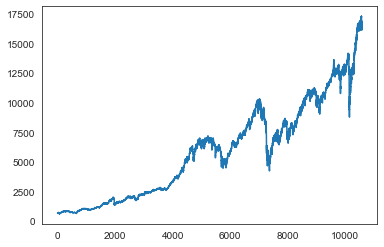

In [8]:
# Plotting the Closing values

plt.plot(stock_data['Close'])

In [9]:
# Calculating the mean value of Open, High, Low and Close

obs = np.arange(1, len(stock_data) + 1, 1)
OHLC_avg = stock_data[['Open', 'High', 'Low', 'Close']].mean(axis = 1)
HLC_avg = stock_data[['High', 'Low', 'Close']].mean(axis = 1)
close_val = stock_data[['Close']]

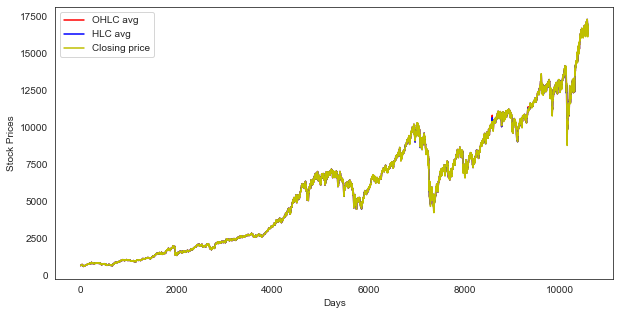

In [10]:
# Plotting the OHLC and HLC values

plt.figure(figsize = (10,5))
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'y', label = 'Closing price')
plt.xlabel("Days")
plt.ylabel("Stock Prices")
plt.legend(loc = 'upper left')
plt.show()

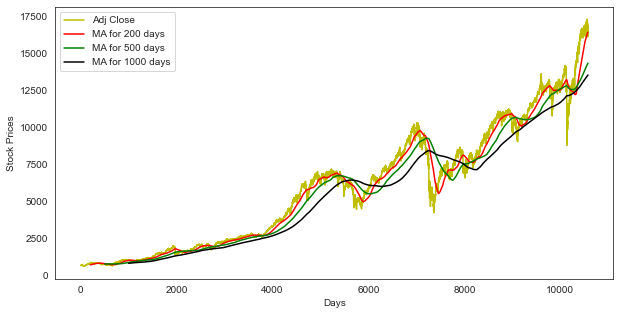

In [11]:
# Plotting Moving Average for 200, 500 and 1000 days. No. of days considered is large because the data spans 40 years

ma_days = [200, 500, 1000]
for ma in ma_days:
    column_name = f"MA for {ma} days"
    stock_data[column_name] = stock_data['Adj Close'].rolling(ma).mean()


plt.figure(figsize=(10, 5))
plt.plot(stock_data['Adj Close'], 'y', label = 'Adj Close')
plt.plot(stock_data['MA for 200 days'], 'r', label = 'MA for 200 days')
plt.plot(stock_data['MA for 500 days'], 'g', label = 'MA for 500 days')
plt.plot(stock_data['MA for 1000 days'], 'k', label = 'MA for 1000 days')
plt.xlabel("Days")
plt.ylabel("Stock Prices")
plt.legend(loc = 'upper left')
plt.show()

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

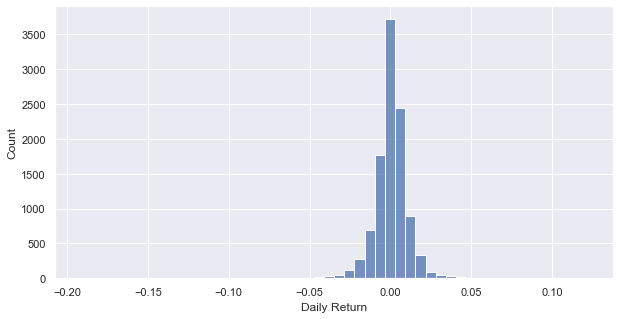

In [12]:
# Plotting percentage of daily returns

stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()
sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(stock_data['Daily Return'], bins = 50)

<AxesSubplot:>

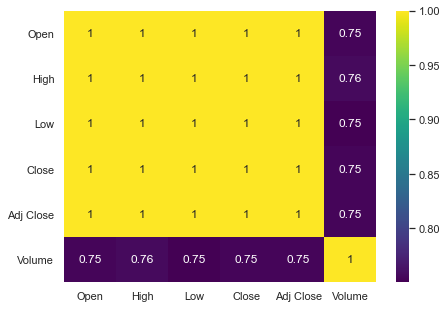

In [13]:
# Studying correlation between attributes

data = pd.read_csv('NYSE-Composite Index.csv')
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap='viridis',annot=True)

In [14]:
# Calculating the differences in Open, High, Low and Close

data['open-high'] = data['Open']-data['High']
data['open-low'] = data['Open'] - data['Low']
data['close-high'] = data['Close']-data['High']
data['close-low'] = data['Close'] - data['Low']
data['high-low'] = data['High'] - data['Low']
data['open-close'] = data['Open'] - data['Close']
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
0,1980-01-02,641.719971,641.719971,641.719971,641.719971,641.719971,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1980-01-03,638.020020,638.020020,638.020020,638.020020,638.020020,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1980-01-04,646.799988,646.799988,646.799988,646.799988,646.799988,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1980-01-07,649.229980,649.229980,649.229980,649.229980,649.229980,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1980-01-08,661.809998,661.809998,661.809998,661.809998,661.809998,0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

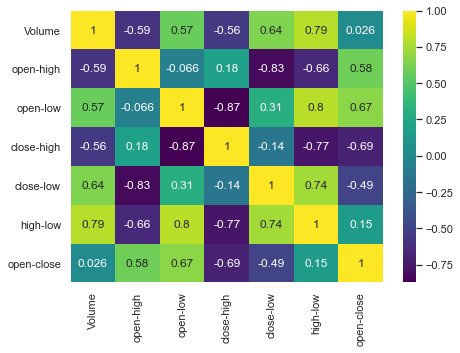

In [15]:
# Heatmap of the differences in Open, High, Low and Close

data = data.drop(['Open','High','Low','Close', 'Adj Close'], axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap='viridis',annot=True)